In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
# Read google drive file
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [125]:
df = pd.read_csv('/content/gdrive/MyDrive/Project - Real Estate/missing_value_imputation.csv')

In [126]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [127]:
df.shape

(3651, 22)

In [128]:
df.head()

,property_name,property_type,link,sector,society,price,price_per_sqft,bedRoom,bathroom,balcony,additionalRoom,floorNum,agePossession,description,property_id,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type
0,2 BHK Flat in Sector 99A Gurgaon,flat,https://www.99acres.com/2-bhk-bedroom-apartmen...,sector 99a,laxmi pareena,0.30,6667.0,2.0,1.0,0,not available,12.0,Relatively New,"2bhk affordable, ready to shift in sec 99a lax...",O66187314,500.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2 BHK Flat in Sector 88A Gurgaon,flat,https://www.99acres.com/2-bhk-bedroom-apartmen...,sector 88a,godrej icon,1.31,8101.0,2.0,2.0,3+,study room,3.0,Relatively New,This lovely 2 bhk apartment/flat in sector 88a...,S69145532,1465.0,1.0,0.0,0.0,0.0,0.0,0.0
2,4 Bedroom House for sale in Sector 54 Gurgaon,house,https://www.99acres.com/4-bhk-bedroom-independ...,sector 54,independent,3.75,26042.0,4.0,4.0,3,servant room,3.0,Moderately Old,East facing old house ready to move in f block...,B59842588,1440.0,0.0,1.0,0.0,0.0,0.0,2.0
3,3 BHK Flat in Sector 37D Gurgaon,flat,https://www.99acres.com/3-bhk-bedroom-apartmen...,sector 37d,bptp terra,1.49,8107.0,3.0,3.0,3,others,20.0,Relatively New,Located in the popular residential address of ...,H70022084,1707.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4 BHK Flat in Sector 83 Gurgaon,flat,https://www.99acres.com/4-bhk-bedroom-apartmen...,sector 83,vatika gurgaon,1.42,8875.0,4.0,4.0,3,"study room,servant room",7.0,Relatively New,This is a 4 bhk row flat the flat occupies a s...,V65295042,2000.0,1.0,1.0,0.0,0.0,0.0,0.0


In [129]:
train_df = df.drop(columns=['property_name','society','price_per_sqft', 'link', 'additionalRoom', 'description', 'property_id'])

In [130]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type
0,flat,sector 99a,0.30,2.0,1.0,0,12.0,Relatively New,500.0,0.0,0.0,0.0,0.0,0.0,0.0
1,flat,sector 88a,1.31,2.0,2.0,3+,3.0,Relatively New,1465.0,1.0,0.0,0.0,0.0,0.0,0.0
2,house,sector 54,3.75,4.0,4.0,3,3.0,Moderately Old,1440.0,0.0,1.0,0.0,0.0,0.0,2.0
3,flat,sector 37d,1.49,3.0,3.0,3,20.0,Relatively New,1707.0,0.0,0.0,0.0,0.0,1.0,0.0
4,flat,sector 83,1.42,4.0,4.0,3,7.0,Relatively New,2000.0,1.0,1.0,0.0,0.0,0.0,0.0


The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


<Axes: >

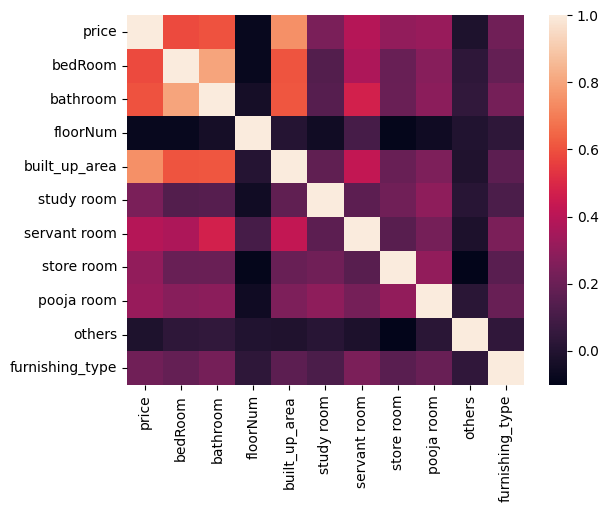

In [131]:
sns.heatmap(train_df.corr())

In [132]:
train_df.corr()['price'].sort_values(ascending=False)

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


price              1.000000
built_up_area      0.747413
bathroom           0.602470
bedRoom            0.582844
servant room       0.389439
pooja room         0.319239
store room         0.300248
study room         0.241717
furnishing_type    0.215356
others            -0.015327
floorNum          -0.079284
Name: price, dtype: float64

<Axes: ylabel='floorNum'>

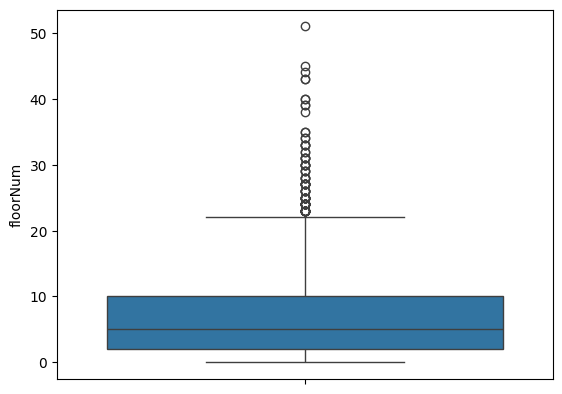

In [133]:
# floorNum
sns.boxplot(df['floorNum'])

In [134]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None  # or "Undefined" or any other label for floors outside the defined bins

In [135]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [136]:
train_df.drop(columns=['floorNum'],inplace=True)

In [137]:
df1 = train_df.copy()

In [138]:
df1['furnishing_type'].value_counts()
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

0.0    2426
2.0    1030
1.0     195
Name: furnishing_type, dtype: int64

In [139]:
# furnishing_type_values = {0: 'Unfurnished', 1: 'Semifurnished', 2: 'Furnished'}
# df1['furnishing_type'] = df1['furnishing_type'].map(furnishing_type_values)

In [140]:
# saving the dataset prior ordinal encoding
df1.to_csv('/content/gdrive/MyDrive/Project - Real Estate/pre_encoding_gurgaon_properties_post_feature_selection.csv', index=False)

In [141]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
data_label_encoded = train_df.copy()

categorical_cols = train_df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

# note : OrdinalEncoder is not applicable for features with more than 2 data values, since tree based models will be used that is why OrdinalEncoder is considered

# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

[array(['flat', 'house'], dtype=object)]
[array(['sector 1', 'sector 102', 'sector 103', 'sector 104', 'sector 105',
       'sector 106', 'sector 107', 'sector 108', 'sector 109',
       'sector 10a', 'sector 11', 'sector 110', 'sector 111',
       'sector 112', 'sector 113', 'sector 12', 'sector 13', 'sector 14',
       'sector 15', 'sector 17', 'sector 17b', 'sector 2', 'sector 21',
       'sector 22', 'sector 23', 'sector 24', 'sector 25', 'sector 26',
       'sector 28', 'sector 3', 'sector 30', 'sector 31', 'sector 33',
       'sector 36', 'sector 36a', 'sector 37c', 'sector 37d', 'sector 38',
       'sector 39', 'sector 4', 'sector 40', 'sector 41', 'sector 43',
       'sector 45', 'sector 46', 'sector 47', 'sector 48', 'sector 49',
       'sector 5', 'sector 50', 'sector 51', 'sector 52', 'sector 53',
       'sector 54', 'sector 55', 'sector 56', 'sector 57', 'sector 58',
       'sector 59', 'sector 6', 'sector 60', 'sector 61', 'sector 62',
       'sector 63', 'sector 63a', 'se

In [142]:
# Technique 1 - Correlation Analysis

correlations = data_label_encoded.corrwith(data_label_encoded['price'])

# Calculate correlation coefficients between features with target variable
correlations = X_label.corrwith(y_label)

# Convert Series to DataFrame
fi_df1 = pd.DataFrame({'feature': X_label.columns,'corr_importance': correlations}).sort_values(by='corr_importance', ascending=False).reset_index(drop=True)

# Display DataFrame
fi_df1

,feature,corr_importance
0,built_up_area,0.747413
1,bathroom,0.602470
2,bedRoom,0.582844
3,property_type,0.498554
4,servant room,0.389439
5,pooja room,0.319239
6,store room,0.300248
7,balcony,0.271241
8,study room,0.241717
9,furnishing_type,0.215356


In [143]:
# Technique 2 - Random Forest Feature Importance

from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
6,built_up_area,0.647033
1,sector,0.106984
0,property_type,0.102606
3,bathroom,0.027526
2,bedRoom,0.025288
8,servant room,0.019547
5,agePossession,0.016153
4,balcony,0.014500
7,study room,0.008349
12,furnishing_type,0.008089


In [144]:
# Technique 3 - Gradient Boosting Feature importances

from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
6,built_up_area,0.682557
1,sector,0.107211
0,property_type,0.097203
2,bedRoom,0.034257
3,bathroom,0.032246
8,servant room,0.022540
9,store room,0.007900
7,study room,0.006843
5,agePossession,0.005112
12,furnishing_type,0.001410


In [145]:
# Technique 4 - Permutation Importance

from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
6,built_up_area,0.717708
0,property_type,0.197482
1,sector,0.157735
8,servant room,0.019238
2,bedRoom,0.013178
3,bathroom,0.010102
4,balcony,0.009626
9,store room,0.006424
7,study room,0.004939
13,floor_category,0.002112


In [146]:
# Technique 5 - LASSO

from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5

,feature,lasso_coeff
6,built_up_area,1.500465
0,property_type,0.685460
3,bathroom,0.244011
9,store room,0.193676
7,study room,0.170981
8,servant room,0.147772
12,furnishing_type,0.133500
10,pooja room,0.083108
2,bedRoom,0.010030
13,floor_category,-0.000000


In [147]:
# Technique 6 - RFE

from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6

,feature,rfe_score
6,built_up_area,0.652358
1,sector,0.106798
0,property_type,0.098923
2,bedRoom,0.026876
3,bathroom,0.023298
8,servant room,0.020496
5,agePossession,0.016194
4,balcony,0.013649
7,study room,0.010286
9,store room,0.007891


In [148]:
# Technique 7 - Linear Regression Weights

from sklearn.linear_model import LinearRegression

# Train a linear regression model on the label-encoded and standardized training data
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7

,feature,reg_coeffs
6,built_up_area,1.503265
0,property_type,0.681963
3,bathroom,0.251429
9,store room,0.198698
7,study room,0.179814
8,servant room,0.155706
12,furnishing_type,0.141210
10,pooja room,0.086022
2,bedRoom,0.013251
13,floor_category,-0.010485


In [149]:
# Technique 8 - SHAP

In [150]:
!pip install shap

In [151]:
import shap

# Compute SHAP values using the trained Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values

array([[-1.61768706e-01, -3.82263474e-01, -4.99575863e-02, ...,
         5.29011577e-04, -9.15220070e-03,  1.59834582e-02],
       [-2.04852512e-01, -2.85088813e-01, -1.37534350e-01, ...,
         1.62395630e-03, -1.04826255e-02, -3.76365159e-03],
       [ 9.64426231e-01,  6.15939768e-01,  2.46078692e-02, ...,
         2.89350241e-03, -1.17388055e-03, -5.50127608e-03],
       ...,
       [-5.07423688e-01,  3.91731085e-01, -2.10127925e-02, ...,
        -2.19931204e-02, -2.40387661e-02, -3.61214407e-02],
       [-2.86630170e-01,  6.02741077e-01, -7.03305389e-03, ...,
         5.68973271e-03,  8.94138459e-03, -2.16969585e-02],
       [-4.45322198e-01,  9.14595244e-02,  4.88489189e-02, ...,
         3.53543123e-03,  1.09052206e-02,  2.45015530e-02]])

In [152]:
fi_df8 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8

,feature,SHAP_score
6,built_up_area,1.207091
0,property_type,0.452163
1,sector,0.380392
3,bathroom,0.114079
8,servant room,0.092594
2,bedRoom,0.059092
4,balcony,0.043631
5,agePossession,0.029512
12,furnishing_type,0.024114
13,floor_category,0.023803


In [153]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').merge(fi_df8,on='feature').set_index('feature')

In [154]:
final_fi_df

,corr_importance,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
built_up_area,0.747413,0.647033,0.682557,0.717708,1.500465,0.652358,1.503265,1.207091
bathroom,0.602470,0.027526,0.032246,0.010102,0.244011,0.023298,0.251429,0.114079
bedRoom,0.582844,0.025288,0.034257,0.013178,0.010030,0.026876,0.013251,0.059092
property_type,0.498554,0.102606,0.097203,0.197482,0.685460,0.098923,0.681963,0.452163
servant room,0.389439,0.019547,0.022540,0.019238,0.147772,0.020496,0.155706,0.092594
pooja room,0.319239,0.006490,0.000161,-0.002237,0.083108,0.005302,0.086022,0.011596
store room,0.300248,0.008080,0.007900,0.006424,0.193676,0.007891,0.198698,0.016427
balcony,0.271241,0.014500,0.001277,0.009626,-0.032129,0.013649,-0.054949,0.043631
study room,0.241717,0.008349,0.006843,0.004939,0.170981,0.010286,0.179814,0.018862


In [155]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [156]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)

feature
built_up_area      0.621729
property_type      0.131427
sector             0.123003
bathroom           0.027614
bedRoom            0.024399
servant room       0.023414
balcony            0.011120
study room         0.007497
store room         0.007244
agePossession      0.007119
furnishing_type    0.005337
floor_category     0.005115
pooja room         0.002926
others             0.002056
dtype: float64

In [157]:
# to drop pooja room, study room, others
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,floor_category
0,0.0,101.0,2.0,1.0,0.0,3.0,500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,91.0,2.0,2.0,4.0,3.0,1465.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,1.0,53.0,4.0,4.0,3.0,0.0,1440.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0
3,0.0,36.0,3.0,3.0,3.0,3.0,1707.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,87.0,4.0,4.0,3.0,3.0,2000.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3646,1.0,47.0,3.0,3.0,2.0,0.0,1900.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3647,1.0,24.0,3.0,2.0,0.0,2.0,3078.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3648,0.0,49.0,3.0,3.0,4.0,0.0,2400.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
3649,0.0,67.0,3.0,3.0,3.0,3.0,2048.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0


In [158]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [159]:
scores.mean()

0.8111592632630279

In [160]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['pooja room', 'study room', 'others']), y_label, cv=5, scoring='r2')

In [161]:
scores.mean()

0.8078652130915203

In [162]:
export_df = X_label.drop(columns=['pooja room', 'study room', 'others'])
export_df['price'] = y_label

In [163]:
export_df.to_csv('/content/gdrive/MyDrive/Project - Real Estate/gurgaon_properties_post_feature_selection.csv', index=False)